In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical


In [24]:
dataset_train = pd.read_csv('Dataset/google_stock_price/Google_Stock_Price_Train.csv') # change the path
training_set = dataset_train.iloc[:, 1:2].values


In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [26]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [28]:
num_classes = X_train.shape[1]
y_train = to_categorical(y_train, num_classes)

In [29]:
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
def build_model(x_train, y_train, optimizer, model):
    print("Optimizer: ", optimizer)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics = ['accuracy'])
    history = model.fit(x_train, y_train, batch_size=32, epochs=5)
    return model, history

In [31]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
adam_model, adam_rnn_history = build_model(X_train, y_train, Adam(), model)
rmsprop_model, rmsprop_rnn_history = build_model(X_train, y_train, RMSprop(), model)
adagrad_model, adagrad_rnn_history = build_model(X_train, y_train, 
                                                     Adagrad(), model)
sgd_model, sgd_rnn_history = build_model(X_train, y_train, 
                                             SGD(), model)

Optimizer:  <keras.src.optimizers.adam.Adam object at 0x0000021D565CAC90>
Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4307 - loss: 3.9087
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9996 - loss: 1.1652
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9995 - loss: 0.0840
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9981 - loss: 0.0484
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 0.0222
Optimizer:  <keras.src.optimizers.rmsprop.RMSprop object at 0x0000021D5F604E30>
Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9989 - loss: 0.0193
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9998 - loss: 0.0042
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9994 - loss: 0.0071
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9991 - loss: 0.0105
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9997 - loss: 0.0042
Optimi

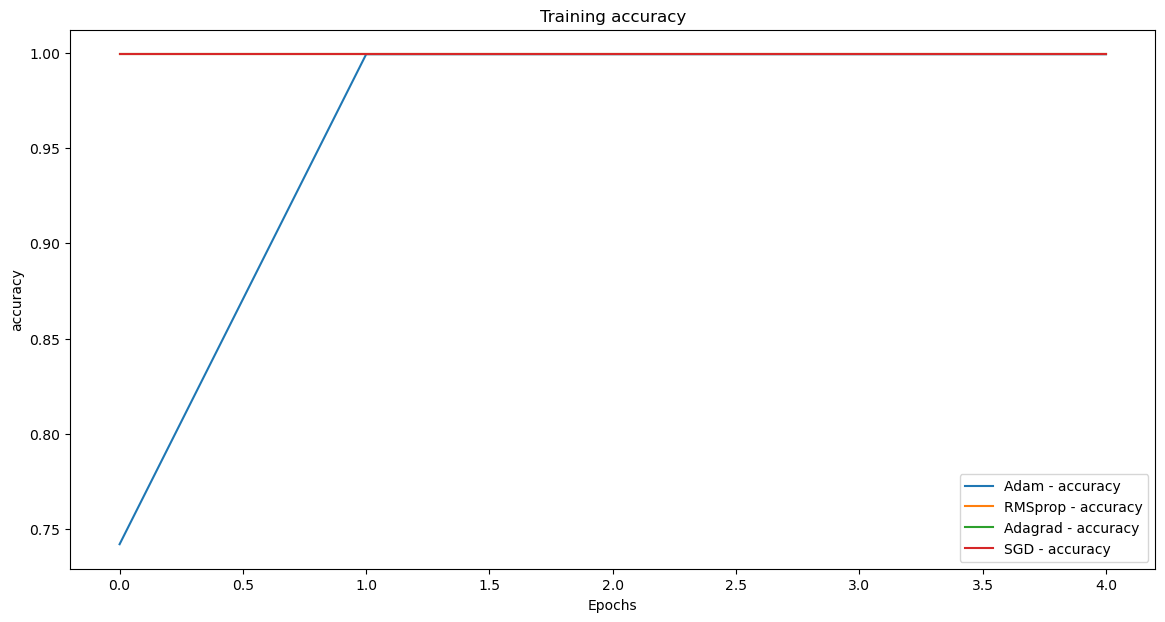

In [32]:
# Function to plot training loss
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - accuracy')
    
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])


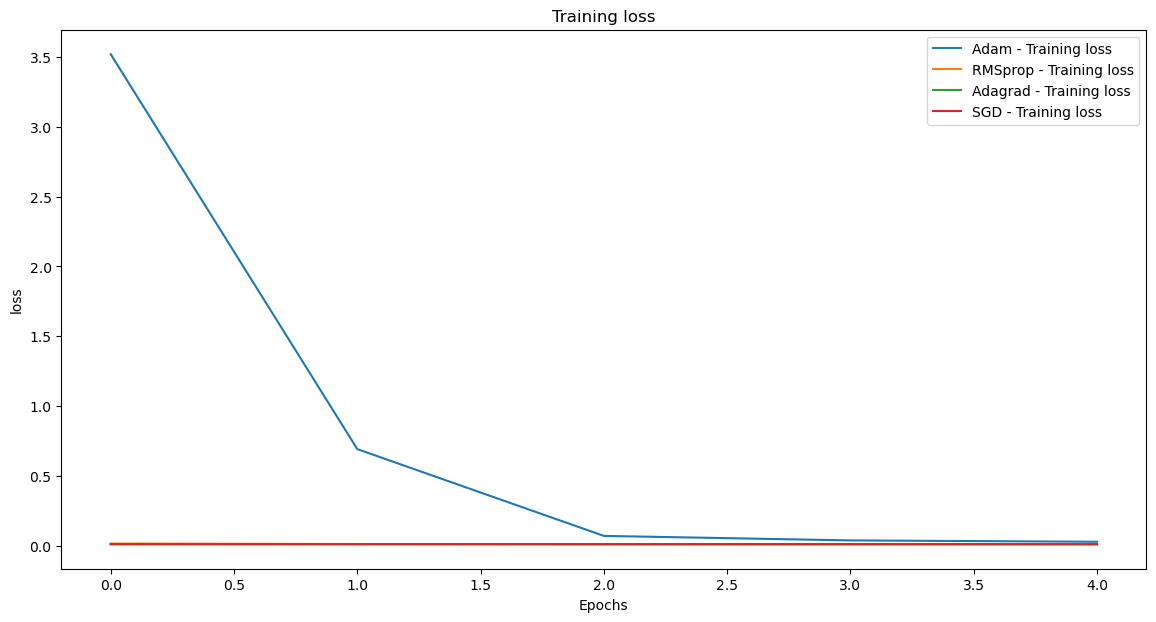

In [33]:
# Function to plot training loss
def plot_loss(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} - Training loss')
    
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])